In [41]:
## here we are going to evaluate a gaussian probability function given a vector of positions, means and a cov matrix
%matplotlib inline
import numpy as np

In [20]:
def log_prob(x, mu, cov):
    diff = x-mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

In [21]:
ndim = 3

np.random.seed(42)
means = np.random.rand(ndim)

cov = np.random.rand(ndim**2).reshape((ndim, ndim))
cov = 0.5 - cov
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

In [24]:
nwalkers = 10
p0 = np.random.rand(nwalkers, ndim)

In [25]:
import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

state = sampler.run_mcmc(p0, 100)
sampler.reset()

sampler.run_mcmc(state, 10000)



State([[-0.1356742   1.41518666  1.2922602 ]
 [ 0.06399084  1.40461973  1.27090893]
 [ 1.09033144  0.07220402 -0.50029999]
 [ 0.41986043  0.53950856  0.45167596]
 [ 0.00270305  1.68154379  1.68225681]
 [ 1.02729369  0.57685119  0.92712996]
 [ 0.6547429   0.59423212  0.58255035]
 [ 0.62114854  0.86682153  0.49452235]
 [ 0.19876379  0.47797966  0.80523661]
 [ 1.12788936  0.64706519 -0.06338449]], log_prob=[-0.5651965  -0.56289339 -2.46320651 -0.75768992 -2.1936795  -3.28676675
 -0.31688575 -0.18302765 -1.78415507 -1.62531493], blobs=None, random_state=('MT19937', array([1974748257, 2064243338, 1549864220, 3527943659, 2312326292,
       2409450260, 1861971661, 2926064363, 4120552649, 4232598530,
       3935605784,  543411562,  558887916, 1034202995, 3409318173,
       3375514350, 2599145522, 3117712724,  635099089,  992441258,
       3025295759, 1716341554, 1690855472, 1896075837,  254423559,
       2981995957,  845974119, 1043044718, 1107926117, 2349335769,
       3925256523,  500137490,

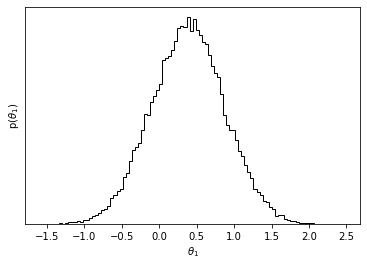

In [43]:
import matplotlib.pyplot as plt

samples = sampler.get_chain(flat=True)
plt.hist(samples[:,0], 100, color='k', histtype='step')
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"p($\theta_1$)")
plt.gca().set_yticks([]);